<a href="https://www.kaggle.com/code/akanshamohan/assignment-2?scriptVersionId=126081777" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rotten-tomatoes-reviews/rt_reviews.csv


In [2]:
import csv
import re
import math

In [3]:
#df = pd.read_csv('/kaggle/input/rotten-tomatoes-reviews/rt_reviews.csv')
file_path = os.path.expanduser('/kaggle/input/rotten-tomatoes-reviews/rt_reviews.csv')
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [4]:
df.head()

,Freshness,Review
0,fresh,"Manakamana doesn't answer any questions, yet ..."
1,fresh,Wilfully offensive and powered by a chest-thu...
2,rotten,It would be difficult to imagine material mor...
3,rotten,Despite the gusto its star brings to the role...
4,rotten,If there was a good idea at the core of this ...


In [5]:
#For development data
reviews = df['Review'].tolist()
dev_rev = []
i = 0
for i in range(1200):
    dev_rev.append(reviews[i])

In [6]:
def build_vocab(data_dev):
    # Create a dictionary to store the word occurrences
    word_counts = {}

    # Iterate through each word and update the counts in the dictionary
    for i in range(len(data_dev)):
        review_one = data_dev[i].split()
        for j in range(len(review_one)) :
            if review_one[j] not in word_counts:
                word_counts[review_one[j]] = 0
            word_counts[review_one[j]] += 1
    return word_counts

word_counts = build_vocab(dev_rev)

In [7]:
#Eliminating words whose occurrence is <5
def final_words(word_counts_unfiltered):
    for word in list(word_counts_unfiltered.keys()):
        if (word_counts_unfiltered[word] < 5):
            del word_counts_unfiltered[word]
    words = list(word_counts_unfiltered)
    return words
words = final_words(word_counts)
print(words)

["doesn't", 'any', 'yet', 'makes', 'its', 'like', 'the', 'rest', 'of', 'our', 'is', 'a', 'but', 'far', 'from', 'and', 'by', "it's", 'good', 'fun.', 'It', 'would', 'be', 'to', 'material', 'more', 'for', 'than', '&', 'Despite', 'star', 'brings', 'hard', 'on', 'If', 'there', 'was', 'idea', 'at', 'this', 'film,', 'been', 'in', 'an', 'jokes,', 'bad', 'goes', 'time', 'satire', 'dark', 'as', 'close', 'it', 'somewhere', '"The', 'deserves', 'better', 'movie', 'debut', 'subject', 'with', 'both', 'humor', 'performance', 'every', '...', 'except', '(and', 'music', 'power', 'almost', 'entirely', 'through', 'visual', 'This', 'not', 'one', "It's", 'also', 'people', 'who', 'action', 'filmmaking', 'turn', 'back', 'around', 'what', 'cinema', 'does', 'best', 'great', "isn't", "can't", 'The', 'are', 'they', 'need', 'film', 'felt', 'less', 'I', 'feel', 'just', 'all', 'over', 'my', 'film.', '--', 'we', 'become', 'part', 'his', 'if', "you're", 'sort', 'leaves', 'you', 'nothing', 'think', 'missed', 'make', 'so

In [8]:
#Dividing the dataset into positive and negative reviews

data_dev = df.iloc[0:1200]
num_documents = len(data_dev)
print(num_documents)

reviews_dict = {}
reviews_dict1 = {}
positive_reviews = {}
negative_reviews = {}


for index, row in data_dev.iterrows():
    review = row['Review']
    freshness = row['Freshness']
    reviews_dict1[review] = freshness
    

for index, row in data_dev.iterrows():
    review = row['Review']
    freshness = row['Freshness']
    if(freshness == 'fresh'):
        positive_reviews[review] = freshness
    else:
        negative_reviews[review] = freshness

1200


In [9]:
# Probability of occurrence
#P[“the”] = num of documents containing ‘the’ / num of all documents
#P[“the” | Positive]  = 
# of positive documents containing “the” / num of all positive review documents
def calc_probabilities(data,words):
    print(words[0])
    #num of documents containing ‘doesn't’
    word_occurrences = {}
    word_occurrences_positive = {}
    word_occurrences_negative = {}
    num_of_all_documents = len(data)
    for k in range(len(words)):
        num_of_documents_containing = 0
        num_of_positive_documents_containing = 0
        num_of_negative_documents_containing = 0

        # Iterate through each word and update the counts in the dictionary
        for i in range(len(reviews_dict1)):
            review_one = list(reviews_dict1.keys())[i].split()
            for j in range(len(review_one)) :
                if review_one[j] == words[k]: # change here for different words
                    num_of_documents_containing += 1
                    if (list(reviews_dict1.values())[i]) == 'fresh':
                         num_of_positive_documents_containing +=1

        word_occurrences[words[k]] = num_of_documents_containing/num_of_all_documents
        word_occurrences_positive[words[k]] =  num_of_positive_documents_containing/num_of_all_documents
        word_occurrences_negative[words[k]] =  (num_of_documents_containing-num_of_positive_documents_containing)/num_of_all_documents        
    return word_occurrences, word_occurrences_positive, word_occurrences_negative   

word_occurrences, word_occurrences_positive, word_occurrences_negative = calc_probabilities(data_dev,words)

doesn't


In [10]:
#To check if code is running correctly
print(word_occurrences['any'])
print("*******")
print(word_occurrences_positive['any'])
print("*******")
print(word_occurrences_negative['any'])

0.025833333333333333
*******
0.0075
*******
0.018333333333333333


In [11]:
def calc_accuracy(data,word_occurrences_positive, word_occurrences_negative,reviews_dic,words):
    # Calculate the accuracy on the development set
    num_correct = 0
    for a in range(len(reviews_dic)):
        prob_fresh = 1
        prob_rotten = 1
        review_for_acc = list(reviews_dic.keys())[a].split()
        for b in range(len(review_for_acc)) :
                if review_for_acc[b] in words:
                    prob_fresh *= word_occurrences_positive[review_for_acc[b]]
                    prob_rotten *= word_occurrences_negative[review_for_acc[b]]
        if prob_fresh >= prob_rotten and list(reviews_dict1.values())[a] == 'fresh':
            num_correct += 1
        elif prob_fresh < prob_rotten and list(reviews_dict1.values())[a]== 'rotten':
            num_correct += 1
    accuracy = num_correct / len(data)
    return accuracy
accuracy = calc_accuracy(data_dev,word_occurrences_positive, word_occurrences_negative,reviews_dict1,words)
print(accuracy)

0.6858333333333333


In [12]:
def do_change_in_probab(word,value,rev):
    if value == 'fresh':
        word_occurrences['word'] = 5/len(rev)
        word_occurrences_positive['word']= 1/len(rev) 
        word_occurrences_negative['word']=0.5/len(rev) 
    if value == 'rotten':
        word_occurrences['word'] = 5/len(rev)
        word_occurrences_positive['word']= 0.5/len(rev) 
        word_occurrences_negative['word']=1/len(rev)
    return word_occurrences_positive['word'], word_occurrences_negative['word']

In [13]:
def calc_accuracy_smooth(words,data,word_occurrences_positive, word_occurrences_negative,reviews_dict_dev):
    # Calculate the accuracy on the development set with smoothing
    num_correct = 0
    for a in range(len(reviews_dict_dev)):
        prob_fresh = 1
        prob_rotten = 1
        review_for_acc = list(reviews_dict_dev.keys())[a].split()
        for b in range(len(review_for_acc)) :
                if review_for_acc[b] in words:
                    prob_fresh *= word_occurrences_positive[review_for_acc[b]]
                    prob_rotten *= word_occurrences_negative[review_for_acc[b]]
                else:
                    #print("yes",review_for_acc[b])
                    word_occurrences_positive[review_for_acc[b]],word_occurrences_negative[review_for_acc[b]] = do_change_in_probab(review_for_acc[b],list(reviews_dict_dev.values())[a],data)
                    prob_fresh *= word_occurrences_positive[review_for_acc[b]]
                    prob_rotten *= word_occurrences_negative[review_for_acc[b]]
        if prob_fresh >= prob_rotten and list(reviews_dict1.values())[a] == 'fresh':
            num_correct += 1
        elif prob_fresh < prob_rotten and list(reviews_dict1.values())[a]== 'rotten':
            num_correct += 1
    accuracy = num_correct / len(data)
    return accuracy
accuracy_smooth = calc_accuracy_smooth(words,data_dev,word_occurrences_positive, word_occurrences_negative,reviews_dict1)
print(accuracy_smooth)

0.99


In [14]:
#P(Class/word) = (P(word/class)*p(class))/ P(word)
#Pclass = 0.5
def top_10_words(words_imp,word_occurrences,word_occurrences_positive, word_occurrences_negative):
    # Calculate P[class | word] for each word in the vocabulary
    # for positive ie fresh class
    p_fresh = {}
    top_10_fresh_words = {}
    for k in words_imp:
        pro = 1
        pro = (word_occurrences_positive[k] * 0.5) / word_occurrences[k]
        p_fresh[k] = pro
    #print(p_fresh)
    top_10_fresh_words = sorted(p_fresh.items(), key=lambda x: x[1], reverse=True) 
    #print(top_10_fresh_words)
    print("For fresh class")
    for key, value in top_10_fresh_words[:10]:
        print("fresh",key, value)
    print("")   
    print("*******************************")
    print("")
    # for negative ie rotten class
    p_rotten = {}
    top_10_rotten_words = {}
    for h in words_imp:
        prorot = 1
        prorot = (word_occurrences_negative[h] * 0.5) / word_occurrences[h]
        p_rotten[h] = prorot
    #print(p_fresh)
    top_10_rotten_words = sorted(p_rotten.items(), key=lambda x: x[1], reverse=True) 
    #print(top_10_fresh_words)
    print("For rotten class")
    for keyrot, valuerot in top_10_rotten_words[:10]:
        print("rotten", keyrot, valuerot)
top_10_words(words,word_occurrences,word_occurrences_positive, word_occurrences_negative)

For fresh class
fresh dark 0.5
fresh close 0.5
fresh music 0.5
fresh become 0.5
fresh fine 0.5
fresh beautifully 0.5
fresh On 0.5
fresh them, 0.5
fresh create 0.5
fresh you've 0.5

*******************************

For rotten class
rotten idea 0.5
rotten Dark 0.5
rotten loses 0.5
rotten worst 0.5
rotten hope 0.5
rotten So 0.5
rotten tired 0.5
rotten lacks 0.5
rotten dull 0.5
rotten becomes 0.45


In [15]:
#Test data accuracy
#For test data
reviewstest = df['Review'].tolist()
test_rev = []
for t in range(1200,2400):
    test_rev.append(reviewstest[t])
word_counts_test = build_vocab(test_rev)
words_test = final_words(word_counts_test)

In [16]:
#Dividing the dataset into positive and negative reviews
num_documents_test = len(test_rev)
print(num_documents_test)
data_test = df.iloc[1200:2400]

reviews_dict_test = {}
reviews_dict1_test = {}
positive_reviews_test = {}
negative_reviews_test = {}
for index, row in data_test.iterrows():
    review = row['Review']
    freshness = row['Freshness']
    reviews_dict_test[review] = freshness


    

for index, row in data_test.iterrows():
    review = row['Review']
    freshness = row['Freshness']
    if(freshness == 'fresh'):
        positive_reviews_test[review] = freshness
    else:
        negative_reviews_test[review] = freshness

1200


In [17]:
word_occurrences_test, word_occurrences_positive_test, word_occurrences_negative_test = calc_probabilities(data_test,words_test)

As


In [18]:
accuracy_final = calc_accuracy_smooth(words_test,data_test,word_occurrences_positive_test, word_occurrences_negative_test,reviews_dict_test)
print(accuracy_final)

0.5


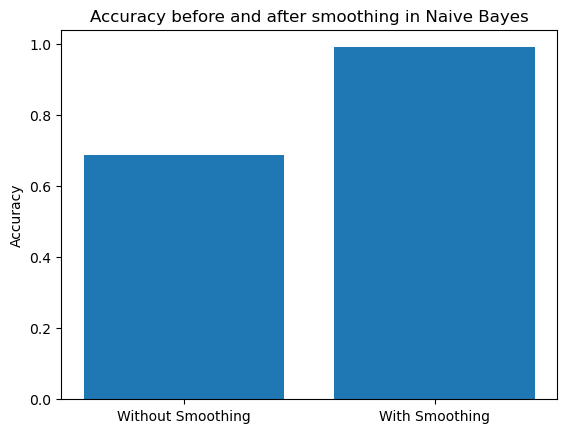

In [19]:
import matplotlib.pyplot as plt
# Accuracy values obtained before and after smoothing
accuracy_values = [accuracy, accuracy_smooth]
# Labels for the x-axis
x_labels = ['Without Smoothing', 'With Smoothing']
# Plot the bar chart
plt.bar(x_labels, accuracy_values)
# Add a title to the plot
plt.title('Accuracy before and after smoothing in Naive Bayes')
# Add a label to the y-axis
plt.ylabel('Accuracy')
# Display the plot
plt.show()
